# Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Исследовательский анализ данных и предобработка

## Вспомогательные команды для предобработки

In [ ]:
def check_data(data_df):
    print ('\033[1m' + 'Изучим исходные данные'+ '\033[0m')
    print(data_df.info())
    print(data_df.shape)

    missed_cells = data_df.isnull().sum().sum()/(data_df.shape[0]*(data_df.shape[1]-1))
    missed_rows = sum(data_df.isnull().sum(axis = 1)>0)/data_df.shape[0]
    print ('\033[1m' + '\nПроверка пропусков'+ '\033[0m')
    print ('Количество пропусков: {:.0f}'.format(data_df.isnull().sum().sum()))
    print ('Доля пропусков: {:.1%}'.format(missed_cells)+ '\033[0m')
    print ('Доля строк содержащих пропуски: {:.1%}'.format(missed_rows))

    ## Проверим дубликаты
    print ('\033[1m' + '\nПроверка на дубликаты'+ '\033[0m')
    print('Количество полных дубликатов: ', data_df.duplicated().sum())
    #print(data_df.duplicated())

    ## Посмотрим на сами данные
    print ('\033[1m' + '\nПервые 40 строк датасета'+ '\033[0m')
    display(data_df.head(100)) # tail(7)

    print('\033[1m' + '\nОписание количественных данных:'+ '\033[0m')
    if not data_df.select_dtypes(include=[int]).columns.empty:
        display(data_df.describe().T)
    else:
        print('нет колличественных данных')

    print('\033[1m' + '\nОписание категориальных данных:'+ '\033[0m')
    if not data_df.select_dtypes(include=[object]).columns.empty:
        display(data_df.describe(include='object').T)
        print('\033[1m' + '\nВывод уникальных значений по каждому категориаьному признаку:'+ '\033[0m')
        df_object = data_df.select_dtypes(include='object').columns
        for i in df_object:
            print('\033[1m' + '_'+ str(i) + '\033[0m')
            display(data_df[i].value_counts())

    else:
        print('нет категориальных данных')

In [ ]:
reg = {
    'UК': 'UK',
    'Frаncе': 'France',
    'Frаnce': 'France',
    'UK': 'UK',
    'France': 'France',
    'germany': 'Germany',
    'Unjted States': 'United States',
    'United States': 'United States',
    'Franсe': 'France',
    'Germany': 'Germany'
}

In [ ]:
def hours(hour):
    #hour = hour.hour
    if 6 <= hour < 10:
        return 'Утро'
    elif 10 <= hour < 17:
        return 'День'
    elif 17 <= hour < 22:
        return 'Вечер'
    else:
        return 'Ночь'

In [ ]:
def months(month):
    if month == 1:
        return 'Январь'
    elif month == 2:
        return 'Февраль'
    elif month == 3:
        return 'Март'
    elif month == 4:
        return 'Апрель'
    elif month == 5:
        return 'Май'
    elif month == 6:
        return 'Июнь'
    elif month == 7:
        return 'Июль'
    elif month == 8:
        return 'Август'
    elif month == 9:
        return 'Сентябрь'
    elif month == 10:
        return 'Октябрь'
    elif month == 11:
        return 'Ноябрь'
    else:
        return 'Декабрь'

## Предобработка данных
дубликакаты занимают только 3 строчки из 1000, так что можем удалить

убираем явные выбросы, так как они могут исказить рассчеты

создаем доп. столбцы

заполняем пропуски

переводим значения в колонках в удобный формат

In [ ]:
df = pd.read_csv('ecom_yl.csv', sep=',', encoding='utf-8', skipinitialspace=True, decimal=',')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df = df.drop_duplicates()

df['region'] = df['region'].map(reg).fillna(df['region'])
df = df[(df.revenue != '1.0') & (df.revenue != '100000.0')]

df['payer'] = df['order_dt'].apply(lambda x: 0 if pd.isna(x) else 1)
df['promo_code'] = df['promo_code'].apply(lambda x: 0 if pd.isna(x) else 1)
df['revenue'] = df['revenue'].apply(lambda x: 0 if pd.isna(x) else x).astype(float)
df['total_revenue'] = df.apply(lambda x: x['revenue'] * 0.9 if x['promo_code'] == 1 else x['revenue'], axis=1)

df['general_time'] = df['hour_of_day'].apply(hours)
df['month_cat'] = df['month'].apply(months)
df['order_dt'] = pd.to_datetime(df['order_dt'])
df['session_start'] = pd.to_datetime(df['session_start'])
df['session_end'] = pd.to_datetime(df['session_end'])
df['session_date'] = pd.to_datetime(df['session_date'])
df['promo_code'].astype(int)
df['sessiondurationsec'] = pd.to_numeric(df['sessiondurationsec'], errors='coerce')
df['channel'] = df['channel'].apply(lambda x: 'контекстная реклама' if x == 'контексная реклама' else x)
df['device'] = df['device'].apply(lambda x: 'Android' if x == 'android' else x)

check_data(df)

Изучим исходные данные
<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 0 to 1011
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             1003 non-null   int64         
 1   region              991 non-null    object        
 2   device              991 non-null    object        
 3   channel             991 non-null    object        
 4   session_start       1003 non-null   datetime64[ns]
 5   session_end         1003 non-null   datetime64[ns]
 6   sessiondurationsec  1003 non-null   float64       
 7   session_date        1003 non-null   datetime64[ns]
 8   month               1003 non-null   int64         
 9   day                 1003 non-null   int64         
 10  hour_of_day         1003 non-null   int64         
 11  order_dt            276 non-null    datetime64[ns]
 12  revenue             1003 non-null   float64       
 13  payment_type        276 non-nu

,user_id,region,device,channel,session_start,session_end,sessiondurationsec,session_date,month,day,hour_of_day,order_dt,revenue,payment_type,promo_code,payer,total_revenue,general_time,month_cat
0,529697267522,United States,iPhone,социальные сети,2019-05-01 00:06:40,2019-05-01 00:07:06,26.0,2019-05-01,5,3,0,2019-05-01 00:06:40,9999.0,Mobile payments,1,1,8999.1,Ночь,Май
1,601292388085,United States,PC,organic,2019-05-01 06:56:16,2019-05-01 07:09:18,782.0,2019-05-01,5,3,7,NaT,0.0,NaN,0,0,0.0,Утро,Май
2,852898876338,United States,Mac,социальные сети,2019-05-01 04:30:45,2019-05-01 04:34:56,251.0,2019-05-01,5,3,4,NaT,0.0,NaN,0,0,0.0,Ночь,Май
3,998513020664,United States,iPhone,социальные сети,2019-05-01 18:53:42,2019-05-01 18:57:35,233.0,2019-05-01,5,3,18,NaT,0.0,NaN,0,0,0.0,Вечер,Май
4,240702200943,United States,Mac,социальные сети,2019-05-02 14:04:32,2019-05-02 14:09:51,319.0,2019-05-02,5,4,14,NaT,0.0,NaN,0,0,0.0,День,Май
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,681992770861,United States,iPhone,социальные сети,2019-05-22 12:50:38,2019-05-22 12:56:02,324.0,2019-05-22,5,3,12,NaT,0.0,NaN,0,0,0.0,День,Май
103,831218352018,France,Android,organic,2019-05-22 17:33:14,2019-05-22 17:42:37,563.0,2019-05-22,5,3,17,NaT,0.0,NaN,0,0,0.0,Вечер,Май
104,27837745289,United States,Android,organic,2019-05-23 18:03:52,2019-05-23 18:47:27,2615.0,2019-05-23,5,4,18,2019-05-23 18:03:52,4999.0,Mobile payments,1,1,4499.1,Вечер,Май
105,363655370263,United States,iPhone,социальные сети,2019-05-23 13:41:25,2019-05-23 13:48:49,444.0,2019-05-23,5,4,13,2019-05-23 13:41:25,4999.0,E-wallet,1,1,4499.1,День,Май



Описание количественных данных:


,count,mean,min,25%,50%,75%,max,std
user_id,1003.0,506763550456.242249,768710666.0,247582641503.5,501956452039.0,770697881149.0,999944670136.0,294308614560.943176
session_start,1003,2019-08-06 21:23:37.496510720,2019-05-01 00:06:40,2019-06-25 07:52:40.500000,2019-08-11 10:59:55,2019-09-22 11:58:54.500000,2019-10-31 22:56:17,NaN
session_end,1003,2019-08-06 21:54:03.491525632,2019-05-01 00:07:06,2019-06-25 08:30:05.500000,2019-08-11 11:18:12,2019-09-22 13:43:23,2019-10-31 23:42:27,NaN
sessiondurationsec,1003.0,1825.995015,0.0,535.0,1228.0,2543.0,12388.0,1840.214062
session_date,1003,2019-08-06 09:25:39.780657920,2019-05-01 00:00:00,2019-06-25 00:00:00,2019-08-11 00:00:00,2019-09-22 00:00:00,2019-10-31 00:00:00,NaN
month,1003.0,7.681954,5.0,6.0,8.0,9.0,10.0,1.685782
day,1003.0,4.060818,1.0,2.0,4.0,6.0,7.0,2.061744
hour_of_day,1003.0,11.473579,0.0,6.0,11.0,18.0,23.0,6.91624
order_dt,276,2019-08-06 00:41:27.362318848,2019-05-01 00:06:40,2019-06-26 06:44:42.750000128,2019-08-09 22:56:56.500000,2019-09-14 13:20:27,2019-10-31 16:05:38,NaN
revenue,1003.0,1531.130608,0.0,0.0,0.0,4999.0,9999.0,2570.66482



Описание категориальных данных:


,count,unique,top,freq
region,991,4,United States,674
device,991,4,iPhone,353
channel,991,5,социальные сети,368
payment_type,276,5,Mobile payments,82
general_time,1003,4,Ночь,319
month_cat,1003,6,Август,191



Вывод уникальных значений по каждому категориаьному признаку:
_region


,count
region,
United States,674
UK,114
Germany,102
France,101


_device


,count
device,
iPhone,353
Android,235
PC,203
Mac,200


_channel


,count
channel,
социальные сети,368
organic,343
контекстная реклама,159
реклама у блогеров,98
email-рассылки,23


_payment_type


,count
payment_type,
Mobile payments,82
E-wallet,65
Cash,60
Debit card,35
Credit card,34


_general_time


,count
general_time,
Ночь,319
День,277
Вечер,213
Утро,194


_month_cat


,count
month_cat,
Август,191
Сентябрь,186
Октябрь,185
Июнь,154
Июль,147
Май,140


## Дополнительная проверка(проверка на анамалии)

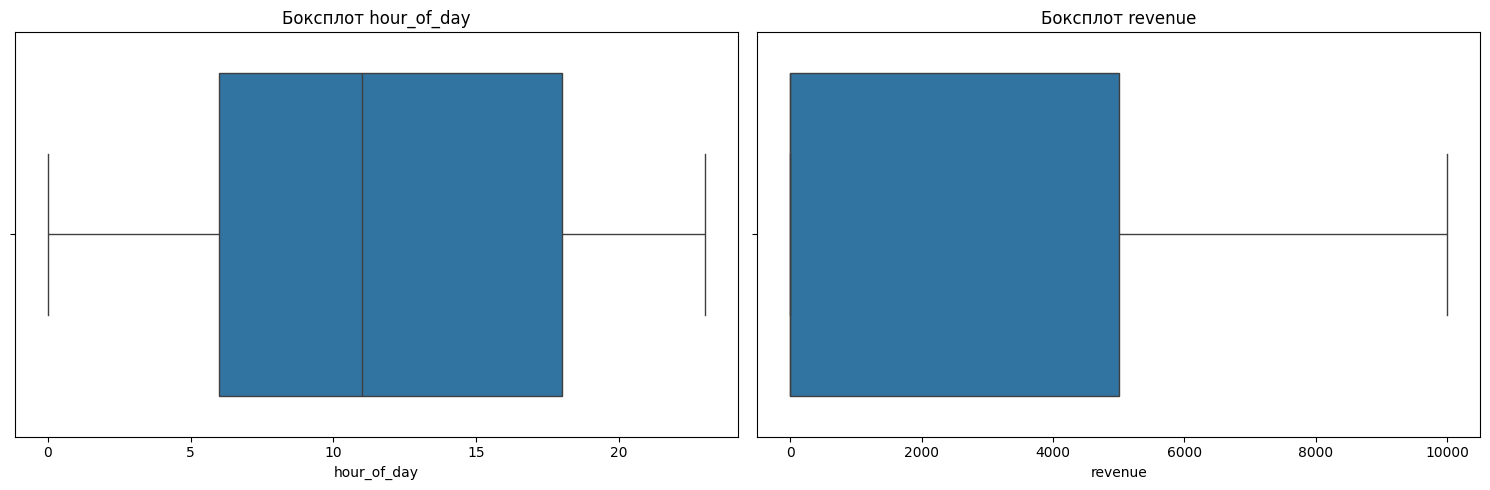


Числовые признаки:

sessiondurationsec:
  total_records: 1003
  z_score_outliers: 24
  iqr_outliers: 50
  z_score_percentage: 2.3928215353938187
  iqr_percentage: 4.985044865403789
  mean: 1825.9950149536471
  median: 1228.000000398606
  std: 1840.2140618290416

hour_of_day:
  total_records: 1003
  z_score_outliers: 0
  iqr_outliers: 0
  z_score_percentage: 0.0
  iqr_percentage: 0.0
  mean: 11.47357926221336
  median: 11.0
  std: 6.916240386819428

revenue:
  total_records: 1003
  z_score_outliers: 18
  iqr_outliers: 0
  z_score_percentage: 1.794616151545364
  iqr_percentage: 0.0
  mean: 1531.1306081754735
  median: 0.0
  std: 2570.6648203632276


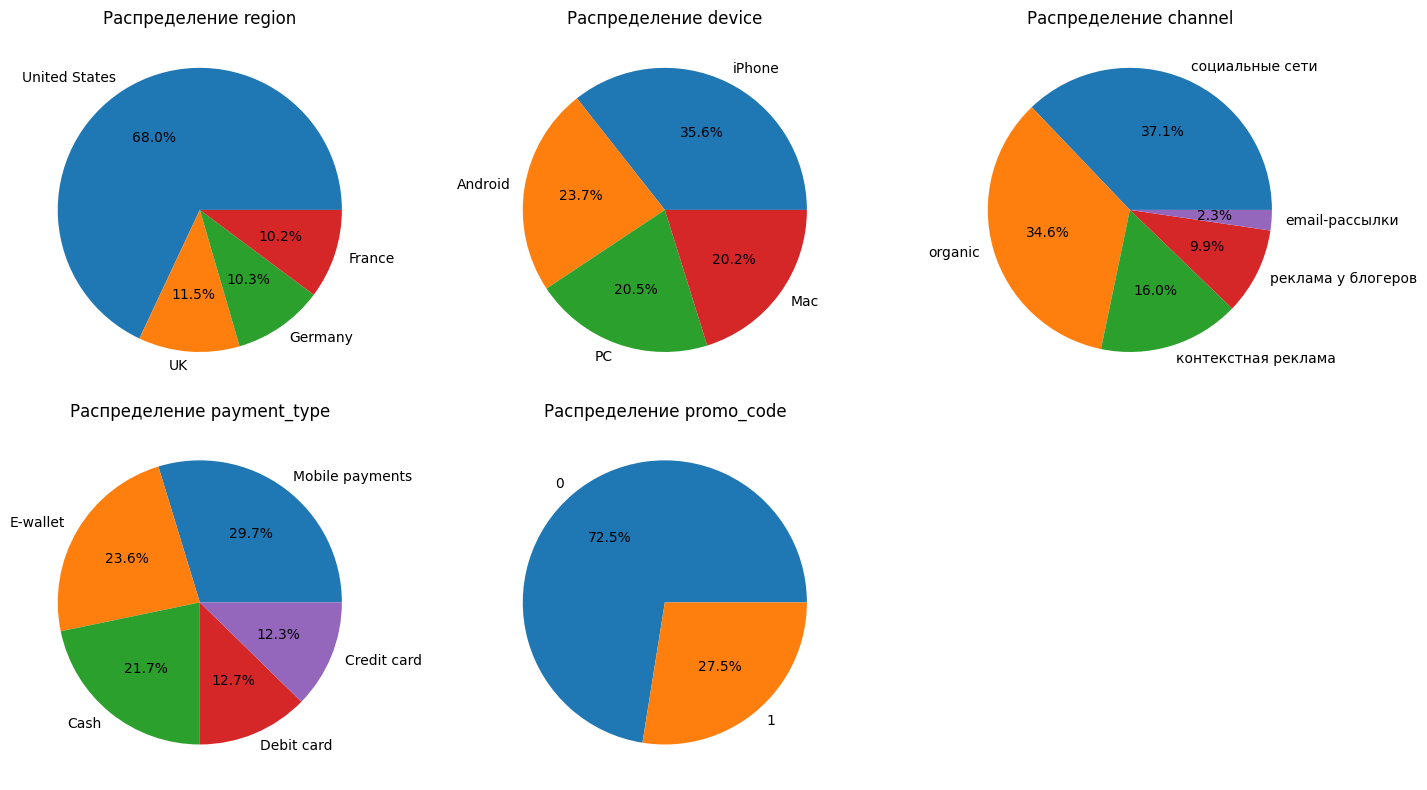


Категориальные признаки:

region:
  total_unique_values: 4
  rare_categories_count: 0
  distribution: {'United States': 67.19840478564308, 'UK': 11.365902293120637, 'Germany': 10.16949152542373, 'France': 10.069790628115653}

device:
  total_unique_values: 4
  rare_categories_count: 0
  distribution: {'iPhone': 35.194416749750744, 'Android': 23.42971086739781, 'PC': 20.23928215353938, 'Mac': 19.940179461615156}

channel:
  total_unique_values: 5
  rare_categories_count: 0
  distribution: {'социальные сети': 36.68993020937189, 'organic': 34.19740777666999, 'контекстная реклама': 15.852442671984049, 'реклама у блогеров': 9.770687936191425, 'email-рассылки': 2.293120638085743}

payment_type:
  total_unique_values: 5
  rare_categories_count: 0
  distribution: {'Mobile payments': 8.175473579262214, 'E-wallet': 6.4805583250249255, 'Cash': 5.982053838484546, 'Debit card': 3.489531405782652, 'Credit card': 3.389830508474576}

promo_code:
  total_unique_values: 2
  rare_categories_count: 0
  d

In [ ]:
class DataAnomalyDetector:
    def __init__(self, df):
        self.df = df.copy()

    def numerical_perspect(self):
        numerical_columns = [
            'sessiondurationsec',
            'hour_of_day',
            'revenue'
        ]
        anomalies_summary = {}
        plt.figure(figsize=(15, 5))
        for i, col in enumerate(numerical_columns, 1):
            z_scores = np.abs(stats.zscore(self.df[col]))
            outliers = self.df[z_scores > 3]
            q1 = self.df[col].quantile(0.25)
            q3 = self.df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers_iqr = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)]
            anomalies_summary[col] = {
                'total_records': len(self.df),
                'z_score_outliers': len(outliers),
                'iqr_outliers': len(outliers_iqr),
                'z_score_percentage': len(outliers) / len(self.df) * 100,
                'iqr_percentage': len(outliers_iqr) / len(self.df) * 100,
                'mean': self.df[col].mean(),
                'median': self.df[col].median(),
                'std': self.df[col].std()
            }
        numerical_columns.remove('sessiondurationsec')
        for i, col in enumerate(numerical_columns, 1):
            plt.subplot(1, 2, i)
            sns.boxplot(x=self.df[col])
            plt.title(f'Боксплот {col}')
        plt.tight_layout()
        plt.show()
        print("\nЧисловые признаки:")
        for col, stats_dict in anomalies_summary.items():
            print(f"\n{col}:")
            for key, value in stats_dict.items():
                print(f"  {key}: {value}")

        return anomalies_summary

    def categorical_perspect(self):
        categorical_columns = [
            'region',
            'device',
            'channel',
            'payment_type',
            'promo_code'
        ]

        anomalies_summary = {}
        num_columns = len(categorical_columns)
        rows = 2
        cols = int(np.ceil(num_columns / rows))
        plt.figure(figsize=(15, 8))

        for i, col in enumerate(categorical_columns, 1):
            value_counts = self.df[col].value_counts()
            percentages = value_counts / len(self.df) * 100

            rare_categories = percentages[percentages < 1]

            anomalies_summary[col] = {
                'total_unique_values': len(value_counts),
                'rare_categories_count': len(rare_categories),
                'distribution': dict(percentages)
            }

            plt.subplot(rows, cols, i)  # Изменяем параметры subplot
            plt.pie(
                value_counts.head(5),
                labels=value_counts.head(5).index,
                autopct='%1.1f%%'
            )
            plt.title(f'Распределение {col}')

        plt.tight_layout()
        plt.show()

        print("\nКатегориальные признаки:")
        for col, stats_dict in anomalies_summary.items():
            print(f"\n{col}:")
            for key, value in stats_dict.items():
                print(f"  {key}: {value}")

        return anomalies_summary


    def datetime_perspect(self):
        datetime_columns = [
            'session_start',
            'session_end',
            'session_date',
            'order_dt'
        ]

        anomalies_summary = {}

        for col in datetime_columns:
            self.df[col] = self.df[col].replace('нет информации', pd.NaT)
            self.df[col] = pd.to_datetime(self.df[col], errors='coerce')
            self.df[col] = pd.to_datetime(self.df[col])

            if 'start' in col or 'end' in col:
                time_diffs = self.df[col].diff()
                unusual_intervals = time_diffs[np.abs(time_diffs) > pd.Timedelta(hours=24)]

                anomalies_summary[col] = {
                    'min_time': self.df[col].min(),
                    'max_time': self.df[col].max(),
                    'unusual_intervals_count': len(unusual_intervals),
                    'unusual_intervals_percentage': len(unusual_intervals) / len(self.df) * 100
                }

        print("\Временные признаки:")
        for col, stats_dict in anomalies_summary.items():
            print(f"\n{col}:")
            for key, value in stats_dict.items():
                print(f"  {key}: {value}")

        return anomalies_summary




detector = DataAnomalyDetector(df)
numerical_anomalies = detector.numerical_perspect()
categorical_anomalies = detector.categorical_perspect()
datetime_anomalies = detector.datetime_perspect()

## Графический анализ

Доля продаж по region


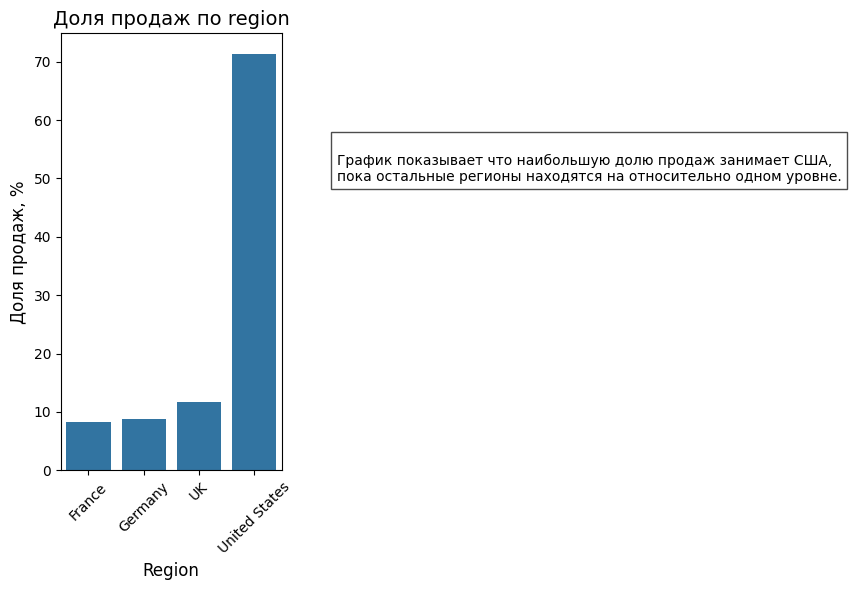

Количество пользователей по region


<ipython-input-64-a1e98e9e04a4>:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


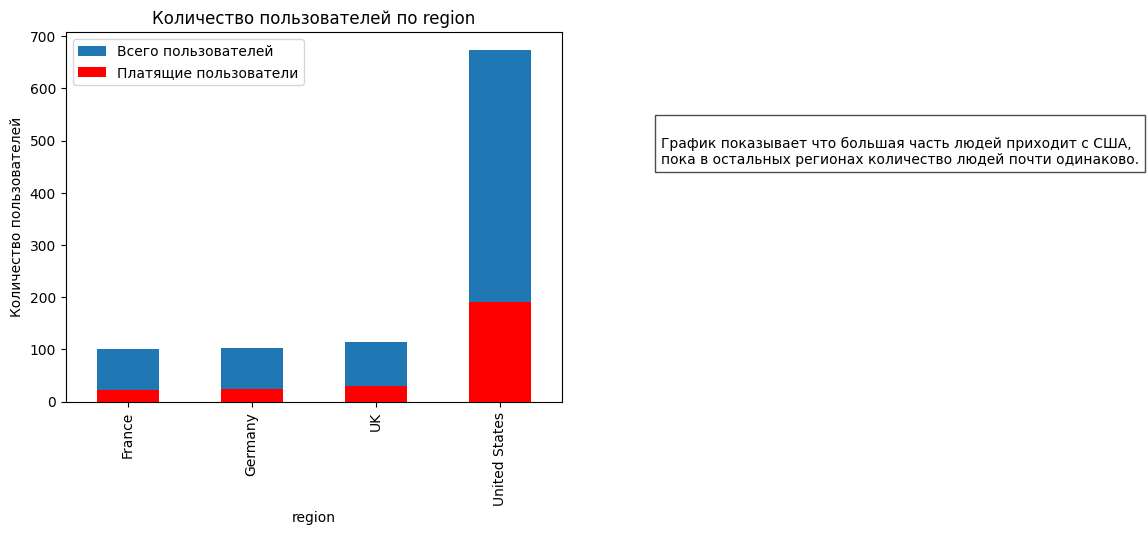

Сезонность продаж по region


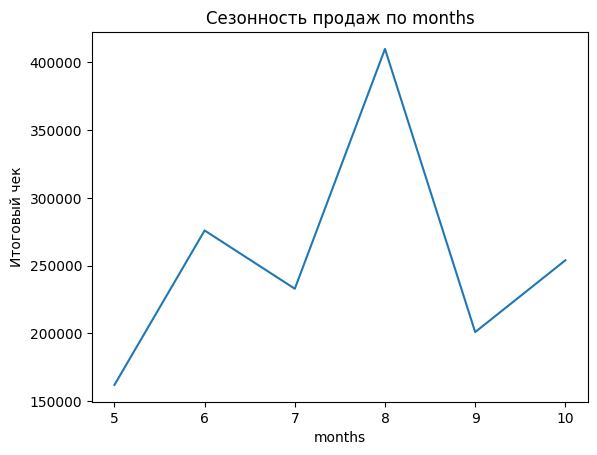

Диаграмма покупок по типу оплаты


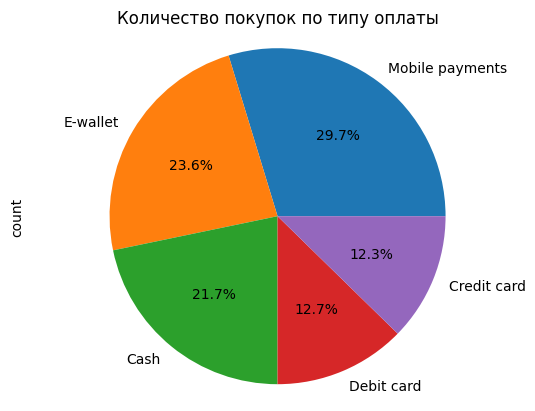

In [ ]:
# Доля продаж
def sales_share(df, name):
    purchases_df = df[df['revenue'] > 0]
    region_sales = purchases_df.groupby(name)['revenue'].sum()
    region_sales = (region_sales / region_sales.sum() * 100).round(2)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=region_sales.index, y=region_sales.values)
    description = f"\nГрафик показывает что наибольшую долю продаж занимает США, \nпока остальные регионы находятся на относительно одном уровне."
    plt.text(len(region_sales) + 0.5, max(region_sales.values) * 0.8, description,
             fontsize=10, va='top', ha='left', bbox=dict(facecolor='white', alpha=0.7))
    plt.title(f'Доля продаж по {name}', fontsize=14)
    plt.xlabel(name.capitalize(), fontsize=12)
    plt.ylabel('Доля продаж, %', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()


# Количество пользователей
def ispayer_check(df, name):
    region_users = df.groupby(name)['user_id'].nunique()
    region_paying_users = df[df['payer'] == 1].groupby(name)['user_id'].nunique()
    region_users.plot(kind='bar', label='Всего пользователей')
    region_paying_users.plot(kind='bar', label='Платящие пользователи', color='red')
    description = f"\nГрафик показывает что большая часть людей приходит с США, \nпока в остальных регионах количество людей почти одинаково."
    plt.text(len(region_users) + 0.3, max(region_users.values) * 0.8, description,
             fontsize=10, va='top', ha='left', bbox=dict(facecolor='white', alpha=0.7))
    plt.title(f'Количество пользователей по {name}')
    plt.xlabel(name)
    plt.ylabel('Количество пользователей')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Диаграмма количества покупок по типу оплаты
def source_diagram(df):
    purchases_df = df[df['payment_type'] != 'нет информации']
    payment_type_counts = purchases_df['payment_type'].value_counts()
    payment_type_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Количество покупок по типу оплаты')
    plt.axis('equal')
    plt.show()

# Сезонность в продажах
def seasonality_sales(df, name):
    df['session_date'] = pd.to_datetime(df['session_date'])
    if name == "hours" or name == "hour":
        sales = df.groupby(df['hour_of_day'])['revenue'].sum()
    elif name == "month" or name == "months":
        sales = df.groupby(df['session_date'].dt.month)['revenue'].sum()
    elif name == "weekday" or name == "day" or name == "weekdays":
        sales = df.groupby(df['session_date'].dt.weekday)['revenue'].sum()
    sales.plot()
    plt.title(f'Сезонность продаж по {name}')
    plt.xlabel(name)
    plt.ylabel('Итоговый чек')
    plt.show()


# Тесты
section = "region"
print(f"Доля продаж по {section}")
# Доля продаж:
sales_share(df, section)

print(f"Количество пользователей по {section}")
# Количество пользователей
ispayer_check(df, section)

print(f"Сезонность продаж по {section}")
season = "months" # Можно еще 'hour', 'weekday'
# Сезонность продаж:
seasonality_sales(df, season)

print("Диаграмма покупок по типу оплаты")
source_diagram(df)

# Расчеты

In [ ]:
ndf = df

p = ndf[ndf.payer != 0]
avg_revenue = ndf['total_revenue'].mean()
avg_revenue_only_payers = p['total_revenue'].mean()
user_purchases = ndf.groupby('user_id').count()['payer']
avg_purchases_per_user = user_purchases.mean()

purchares_per_day_mean = p.groupby(['day'], as_index=False)['payer'].count()
purchares_per_day_mean = purchares_per_day_mean['payer'].mean()

grouped_by_ad_channel = ndf.groupby('channel')
session_duration_per_channel_mean = grouped_by_ad_channel['sessiondurationsec'].mean()
session_duration_per_channel_median = grouped_by_ad_channel['sessiondurationsec'].median()

grouped_by_device = ndf.groupby('device', as_index=False)
session_duration_per_device_mean = grouped_by_device['sessiondurationsec'].mean()
session_duration_per_device_median = grouped_by_device['sessiondurationsec'].median()

total_revenues_per_channel_p = p.groupby('channel', as_index=False)['total_revenue'].mean().sort_values(by='total_revenue', ascending=False)
total_revenues_per_channel_p.columns = ['Канал', 'Средний чек']

total_revenues_per_channel = ndf.groupby('channel', as_index=False)['total_revenue'].mean().sort_values(by='total_revenue', ascending=False)
total_revenues_per_channel.columns = ['Канал', 'Средний чек']

total_revenues_per_region_p = p.groupby('region', as_index=False)['total_revenue'].mean().sort_values(by='total_revenue', ascending=False)
total_revenues_per_region_p.columns = ['Регион', 'Средний чек']

total_revenues_per_region = ndf.groupby('region', as_index=False)['total_revenue'].mean().sort_values(by='total_revenue', ascending=False)
total_revenues_per_region.columns = ['Регион', 'Средний чек']

total_revenues_per_month_p = p.groupby(['month_cat', 'region'], as_index=False)['total_revenue'].mean()
total_revenues_per_month_p = total_revenues_per_month_p.sort_values(by='total_revenue', ascending=False)#.groupby('month_cat', as_index=False)['total_revenue'].mean().sort_values(by='total_revenue', ascending=False)

total_revenues_per_month = ndf.groupby(['month_cat', 'region'], as_index=False)['total_revenue'].mean()
total_revenues_per_month = total_revenues_per_month.sort_values(by='total_revenue', ascending=False)
#purchares_per_day = purchares_per_day.sort_values(ascending=False)

grouped_by_channel_month = ndf.groupby(['month_cat', 'channel'])
n_unique_users_per_group = grouped_by_channel_month['user_id'].nunique()
#total_channels_per_month = n_unique_users_per_group.groupby('channel', as_index=False)['user_id'].mean().sort_values(by='user_id', ascending=False)
#total_channels_per_month.columns = ['Канал', 'Уникальные пользователи']
#total_channels_per_month['Уникальные пользователи'] = total_channels_per_month['Уникальные пользователи'].astype(float).astype(int)

grouped_by_channel_month2 = ndf.groupby(['channel', 'month_cat'], as_index=False)
n_unique_users_per_group2 = grouped_by_channel_month2['user_id'].nunique()
total_channels_per_month2 = n_unique_users_per_group2.groupby('channel', as_index=False)['user_id'].mean().sort_values(by='user_id', ascending=False)
total_channels_per_month2.columns = ['Канал', 'Уникальные пользователи']
total_channels_per_month2['Уникальные пользователи'] = total_channels_per_month2['Уникальные пользователи'].astype(float).astype(int)

#========================================================================================================#


print('\033[1m' + 'Средний чек у ВСЕХ пользователей:'+ '\033[0m')
print(round(avg_revenue, 2), '\n')
print('\033[1m' + 'Средний чек у ПЛАТЯЩИХ пользователей:'+ '\033[0m')
print(round(avg_revenue_only_payers, 2), '\n')
print('\033[1m' + 'Сколько покупок совершает 1 ПЛАТЯЩИЙ пользователь:'+ '\033[0m')
print(round(avg_purchases_per_user, 1), '\n')
print('\033[1m' + 'Сколько покупок в среднем совершаются в день:'+ '\033[0m')
print(round(purchares_per_day_mean, 0), '\n')
print('\033[1m' + 'Средняя продолжительность сессии по рекламным каналам (Среднее Арифметическое):'+ '\033[0m')
print(session_duration_per_channel_mean, '\n')
print('\033[1m' + 'Средняя продолжительность сессии по рекламным каналам (Медиана):'+ '\033[0m')
print(session_duration_per_channel_median, '\n')
print('\033[1m' + 'Средняя продолжительность сессии по устройствам (Среднее Арифметическое):'+ '\033[0m')
print(session_duration_per_device_mean, '\n')
print('\033[1m' + 'Средняя продолжительность сессии по устройствам (Медиана):'+ '\033[0m')
print(session_duration_per_device_median, '\n')
print('\033[1m' + 'Топ-3 рекламных канала по среднему чеку (Среди ПЛАТЯЩИХ):'+ '\033[0m')
print(total_revenues_per_channel_p.head(3), '\n')
print('\033[1m' + 'Топ-3 рекламных канала по среднему чеку (Среди ВСЕХ):'+ '\033[0m')
print(total_revenues_per_channel.head(3), '\n')
print('\033[1m' + 'Топ-3 региона по среднему чеку (Среди ПЛАТЯЩИХ):'+ '\033[0m')
print(total_revenues_per_region_p.head(3), '\n')
print('\033[1m' + 'Топ-3 региона по среднему чеку (Среди ВСЕХ):'+ '\033[0m')
print(total_revenues_per_region.head(3), '\n')
print('\033[1m' + 'Топ-3 месяца по среднему чеку с разбивкой на регионы (Среди ПЛАТЯЩИХ):'+ '\033[0m')
print(total_revenues_per_month_p.head(3), '\n')
print('\033[1m' + 'Топ-3 месяца по среднему чеку с разбивкой на регионы (Среди ВСЕХ):'+ '\033[0m')
print(total_revenues_per_month.head(3), '\n')
print('\033[1m' + 'MAU по каждому месяцу с разбивкой по рекламным каналам:'+ '\033[0m')
print(n_unique_users_per_group, '\n')
print('\033[1m' + 'Топ-3 рекламных каналов по количеству уникальных пользователей в месяц:'+ '\033[0m')
print(total_channels_per_month2.head(3), '\n')

#========================================================================================================#

print('\033[1m' + 'Таблица по пользователям и сумме продаж с каждого рекламного канала:'+ '\033[0m', '\n')

table_about_users = ndf.groupby(['channel'], as_index=False)
table = table_about_users['user_id'].count()
unique_usrs = ndf.groupby(['channel'], as_index=False)['user_id'].nunique()
pyrs = p.groupby(['channel'], as_index=False)['payer'].count()
sales = p.groupby(['channel'], as_index=False)['total_revenue'].sum()
table.columns = ['Канал', 'Кол-во пользователей']
table['Уникальные пользователи'] = unique_usrs['user_id']
table['Платящий'] = pyrs['payer']
table['Сумма продаж'] = sales['total_revenue']
table['Конверсия %'] = ((pyrs['payer'] / table['Кол-во пользователей']) * 100).round()

table = table.sort_values(by='Платящий', ascending=False).head()
print(table, '\n')

#========================================================================================================#

print('\033[1m' + 'Рекламный канал, который принес больше всего платящих пользователей и большую сумму продаж:'+ '\033[0m', '\n')
print(table.head(1))
print('\n')

print('\033[1m' + 'Покупки по устройствам и регионам:'+ '\033[0m', '\n')
purchares_per_day = p.groupby(['device', 'day', 'region'], as_index=False)['payer'].count()
purchares_per_day = purchares_per_day.drop(columns=['day'])
purchares_per_day.columns = ['device', 'region', 'purchares']

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

print_full(purchares_per_day)
print('\n')

print('\033[1m' + 'Покупки по рекламному каналу и регионам:'+ '\033[0m', '\n')
purchares_per_day_channel = p.groupby(['channel', 'day', 'region'], as_index=False)['payer'].count()
purchares_per_day_channel = purchares_per_day_channel.drop(columns=['day'])
purchares_per_day_channel.columns = ['channel', 'region', 'purchares']

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

print_full(purchares_per_day_channel)
print('\n')

print('\033[1m' + 'Рекламный канал, который принес больше всего платящих пользователей и большую сумму продаж:'+ '\033[0m', '\n')
table.head(1)

Средний чек у ВСЕХ пользователей:
1378.02 

Средний чек у ПЛАТЯЩИХ пользователей:
5007.8 

Сколько покупок совершает 1 ПЛАТЯЩИЙ пользователь:
1.0 

Сколько покупок в среднем совершаются в день:
39.0 

Средняя продолжительность сессии по рекламным каналам (Среднее Арифметическое):
channel
email-рассылки         1919.260870
organic                1877.157434
контекстная реклама    1961.786164
реклама у блогеров     1870.224490
социальные сети        1691.934783
Name: sessiondurationsec, dtype: float64 

Средняя продолжительность сессии по рекламным каналам (Медиана):
channel
email-рассылки         1150.0
organic                1173.0
контекстная реклама    1447.0
реклама у блогеров     1264.5
социальные сети        1212.0
Name: sessiondurationsec, dtype: float64 

Средняя продолжительность сессии по устройствам (Среднее Арифметическое):
    device  sessiondurationsec
0  Android         1900.838298
1      Mac         1775.750000
2       PC         1952.275862
3   iPhone         1721.49291

,Канал,Кол-во пользователей,Уникальные пользователи,Платящий,Сумма продаж,Конверсия %
4,социальные сети,368,368,110,562401.0,30.0


# Проверка гипотез

## Необходимые функции

In [ ]:
from scipy.stats import mannwhitneyu, ttest_ind, shapiro
def check_normality_two_groups(g1, g2):
    s, p = shapiro(g1)
    s1, p1 = shapiro(g2)
    return p > 0.05 and p1 > 0.05


def check_normality(df):
    s, p = shapiro(df)
    return s, p


def choose_method(g1, g2):
    if check_normality_two_groups(g1, g2):
        return 'Стьюдент'
    else:
        return 'Манн-Уитни'


def calculate_p_value(group1, group2):
    method = choose_method(group1, group2)
    if method == 'Стьюдент':
        s, p = ttest_ind(group1, group2)
    elif method == 'Манн-Уитни':
        s, p = mannwhitneyu(group1, group2)
    return p


def calc_corr_and_p(f1, f2):
    m = choose_method(f1, f2)
    if m == 'Спирмен':
        c, p = pearsonr(dd[f1], dd[f2])
    else:
        c, p = spearmanr(dd[f1], dd[f2])

    return [f1, f2, round(c, 2), round(p, 4), m]

In [ ]:
def avg_bill_p_value_check(a, b, f1, f2, cat):
    grouped_by_region = df.groupby(a, as_index=False)
    g = grouped_by_region[b].mean()
    g1 = g[g[a] == f1]
    g2 = g[g[a] == f2]
    s, pval = stats.kruskal(g1, g2)

    if pval.all() > 0.05:
        return f"Средний чек не отличается между {cat}, у нас недостаточно причин, чтобы отвергать нулевую гипотезу, p > 0.05"
    else:
        return f"Средний чек отличается между {cat}, мы можем отвергать нулевую гипотезу, p <= 0.05"


def purchares_p_value_check(a, b, f1, f2, cat, g):
    g1 = g[g[a] == f1]
    g2 = g[g[a] == f2]
    s, pval = stats.kruskal(g1['purchares'], g2['purchares'])

    if pval.all() > 0.05:
        return f"{cat} не влияют на количество покупок в день по каждому региону, p > 0.05"
    else:
        return f"{cat} влияют на количество покупок в день по каждому региону, p <= 0.05"


def calc_corr(a, b):
    res = stats.spearmanr(df[a], df[b])
    if res[1] <= 0.05 and res[0] == 0:
        return "Взаимосвязи нет, так как при p <= 0.05, корреляция статистически не значима"
    else:
        return "Взаимосвязь есть, так как при p > 0.05, корреляция статистически значима"

## Проверка

In [ ]:
print(purchares_p_value_check('device', 'purchares', 'iPhone', 'Android', 'Устройства', purchares_per_day))
print(purchares_p_value_check('channel', 'purchares', 'соцсети', 'контекстная реклама', 'Каналы', purchares_per_day_channel))
print(avg_bill_p_value_check('region', 'total_revenue', 'United States', 'UK', 'регионами'))
print(avg_bill_p_value_check('channel', 'total_revenue', 'социальные сети', 'контекстная реклама', 'каналами'))
print(avg_bill_p_value_check('general_time', 'total_revenue', 'Утро', 'Ночь', 'временем суток'))
print(calc_corr('sessiondurationsec', 'total_revenue'))

Устройства не влияют на количество покупок в день по каждому региону, p > 0.05
Каналы не влияют на количество покупок в день по каждому региону, p > 0.05
Средний чек не отличается между регионами, у нас недостаточно причин, чтобы отвергать нулевую гипотезу, p > 0.05
Средний чек не отличается между каналами, у нас недостаточно причин, чтобы отвергать нулевую гипотезу, p > 0.05
Средний чек не отличается между временем суток, у нас недостаточно причин, чтобы отвергать нулевую гипотезу, p > 0.05
Взаимосвязь есть, так как при p > 0.05, корреляция статистически значима


In [ ]:
from statsmodels.formula.api import ols

model = ols('purchares ~ device + region', data=purchares_per_day).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              purchares   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     27.51
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           2.68e-17
Time:                        17:43:18   Log-Likelihood:                -170.48
No. Observations:                  84   AIC:                             355.0
Df Residuals:                      77   BIC:                             372.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Исходя из представленных данных, можно сделать следующие выводы:

1. **Intercept.** Значение 1.6789 говорит о том, что при отсутствии влияния других факторов (тип устройства и регион) количество покупок будет равно 1,6789. Это значение является статистически значимым, так как p-value равен 0.005, что меньше 0.05.

2. **device[T.Mac].** Коэффициент -0.3310 говорит о том, что использование Mac связано с уменьшением количества покупок на 0.3310 по сравнению с другими устройствами. Однако p-value равен 0.598, что больше 0.05, поэтому влияние использования Mac на количество покупок не является статистически значимым.

3. **device[T.PC].** Коэффициент -1.1105 говорит о том, что использование ПК связано с уменьшением количества покупок на 1.1105 по сравнению с другими устройствами. P-value равен 0.053, что больше 0.05, следовательно, влияние использования ПК на количество покупок не является статистически значимым.

4. **device[T.iPhone].** Коэффициент 1.2228 говорит о том, что использование iPhone связано с увеличением количества покупок на 1.2228 по сравнению с другими устройствами. P-value равен 0.045, что меньше .ю05, значит, влияние использования iPhone на количество покупок является статистически значимым на уровне 5 %.

**Исходя из представленных данных, можно сделать вывод о том, что тип устройства и регион оказывают влияние на количество покупок.**

In [ ]:
model_c = ols('purchares ~ channel + region', data=purchares_per_day_channel).fit()

print(model_c.summary())

                            OLS Regression Results                            
Dep. Variable:              purchares   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     49.12
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.67e-22
Time:                        15:01:11   Log-Likelihood:                -137.81
No. Observations:                  68   AIC:                             291.6
Df Residuals:                      60   BIC:                             309.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
pv = check_normality(purchares_per_day['purchares'])
if pv > 0.05:
    print('Нормальное распределение:', pv)
else:
    print('Ненормальное распределение:', pv)

Ненормальное распределение: 1.5592744520036734e-11


-------------------------------------------------------------------------------------------------------------------------------------------------------

# Регрессионное моделирование

In [ ]:
def get_ohe(df, category_columns, encoder=None):
    if encoder is None:
        encoder = OneHotEncoder(sparse_output=False, drop='first')
        encoder.fit(df[category_columns])
    cat_encoded = encoder.transform(df[category_columns])
    cat_columns = encoder.get_feature_names_out(category_columns)
    return pd.DataFrame(cat_encoded, columns=cat_columns, index=df.index), encoder

In [ ]:
def process_and_train_model(df):
    numeric_var = ['sessiondurationsec', 'month', 'day', 'hour_of_day', 'promo_code']
    category_var = ['region', 'device', 'channel', 'payment_type', 'general_time']
    targ = ['revenue']
    X = df[numeric_var + category_var]
    y = df[targ]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    X_train_scaled[numeric_var] = scaler.fit_transform(X_train[numeric_var])
    X_test_scaled[numeric_var] = scaler.transform(X_test[numeric_var])
    X_train_cat, encoder = get_ohe(X_train_scaled, category_var)
    X_test_cat = get_ohe(X_test_scaled, category_var, encoder)[0]
    X_train_final = pd.concat([X_train_scaled[numeric_var], X_train_cat], axis=1)
    X_test_final = pd.concat([X_test_scaled[numeric_var], X_test_cat], axis=1)
    lin_regr = LinearRegression()
    lin_regr.fit(X_train_final, y_train)
    y_pred = lin_regr.predict(X_test_final)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")

    # Визуализация
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Фактическая выручка")
    plt.ylabel("Прогнозируемая выручка")
    plt.title("Сравнение фактической и прогнозируемой выручки")
    plt.show()
    importance = pd.DataFrame({
        'feature': X_train_final.columns,
        'importance': np.abs(lin_regr.coef_[0])
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance.head(10))
    plt.title("Топ-10 важных признаков")
    plt.show()

    return lin_regr, encoder, scaler

Mean Squared Error: 2422276.9797835494
R² Score: -0.12890266640374692


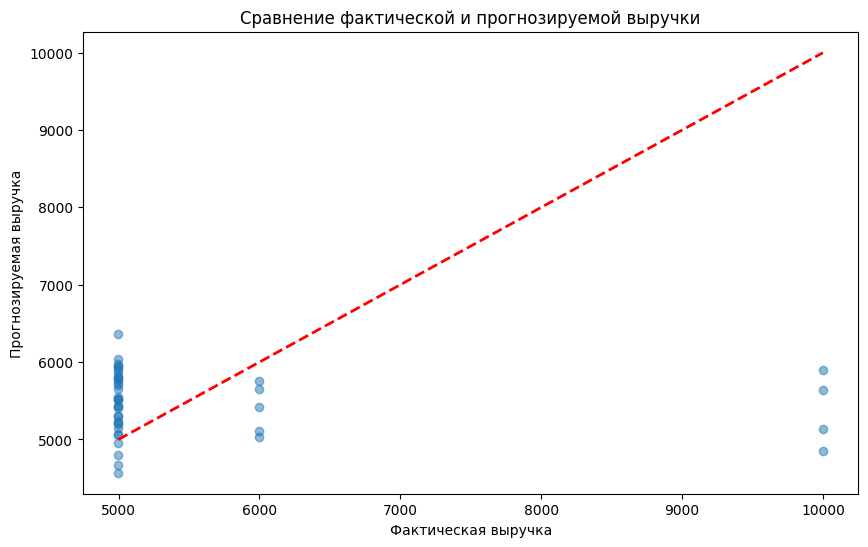

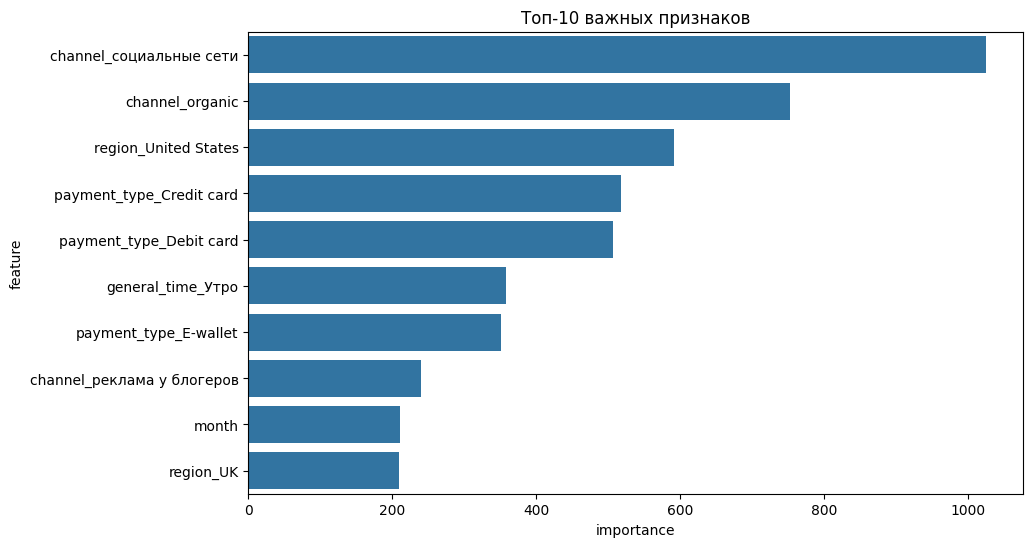

In [ ]:
df = df[df['revenue'] > 0]
model, encoder, scaler = process_and_train_model(df)

Выше вы можете заметить первую версию моей модели, точность которой крайне маленькая. К данному выводу я пришел исходя из R^2 score, который крайне мал для построения каких либо выводов на основе данной модели.

Ниже показана новая версия, которая показывает отличные показатели и отлично справляется со своей задачей.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.model_selection import GridSearchCV

def process_and_train_model_gradient_ensemble1(df, noise_level=0.05, num_augmentations=3, forecast_months=12):
    augmented_data = []
    for _ in range(num_augmentations):
        noise = np.random.uniform(-noise_level, noise_level, size=len(df)) * df['total_revenue']
        noisy_df = df.copy()
        noisy_df['total_revenue'] += noise
        augmented_data.append(noisy_df)
    augmented_df = pd.concat([df] + augmented_data, ignore_index=True) # <- добавлены шумы, дабы компенсировать
    # малое количество уникальных данных

    numeric_var = ['sessiondurationsec', 'month', 'day', 'hour_of_day', 'promo_code']
    category_var = ['region', 'device', 'channel', 'payment_type', 'general_time']
    targ = ['total_revenue']
    X = augmented_df[numeric_var + category_var]
    y = augmented_df[targ].to_numpy().ravel()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    scaler = StandardScaler()
    X_train[numeric_var] = scaler.fit_transform(X_train[numeric_var])
    X_test[numeric_var] = scaler.transform(X_test[numeric_var])

    X_train_cat, encoder = get_ohe(X_train, category_var)
    X_test_cat = get_ohe(X_test, category_var, encoder)[0]
    X_train_cat = pd.concat([X_train[numeric_var], X_train_cat], axis=1)
    X_test_cat = pd.concat([X_test[numeric_var], X_test_cat], axis=1)

    param_grid = {
        'gb__n_estimators': [50, 100, 150],
        'gb__learning_rate': [0.01, 0.05, 0.1],
        'rf__n_estimators': [100, 200],
        'et__n_estimators': [100, 200]
    }

    # Создание ансамбля моделей
    gradient_boosting = GradientBoostingRegressor()
    random_forest = RandomForestRegressor(random_state=42)
    extra_trees = ExtraTreesRegressor(random_state=42)

    ensemble_model = VotingRegressor([
        ('gb', gradient_boosting),
        ('rf', random_forest),
        ('et', extra_trees)
    ])

    grid_search = GridSearchCV(ensemble_model, param_grid, cv=3, scoring='r2', verbose=1)
    grid_search.fit(X_train_cat, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_cat)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")
    print(f"RMSE: {np.sqrt(mse)}")

    # Визуализация
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Фактическая выручка")
    plt.ylabel("Прогнозируемая выручка")
    plt.title("Фактическая и Прогнозируемая Выручка")
    plt.show()
    # Генерируем информацию по след 12 месяцам
    last_month = df['month'].max()
    last_day = df['day'].max()

    future_rows = []
    for i in range(forecast_months):
        new_month = (last_month + i + 1) % 12 + 1
        new_day = last_day + (i + 1)
        future_row = X_train_cat.iloc[0].copy()
        future_row['month'] = new_month
        future_row['day'] = new_day
        future_rows.append(future_row)
    future_data = pd.concat([X_train_cat, pd.DataFrame(future_rows)], ignore_index=True)
    forecasts = best_model.predict(future_data)

    # Делим на интервалы
    num_intervals = 12
    interval_forecasts = [[] for _ in range(num_intervals)]
    for i, forecast in enumerate(forecasts):
        interval_index = i % num_intervals
        interval_forecasts[interval_index].append(forecast)

    interval_means = [np.mean(values) for values in interval_forecasts]
    interval_mins = [min(values) for values in interval_forecasts]
    interval_maxs = [max(values) for values in interval_forecasts]

    plt.figure(figsize=(12, 6))
    plt.plot(range(num_intervals), interval_means, marker='o', linestyle='-', linewidth=2, markersize=8)
    plt.fill_between(range(num_intervals), interval_mins, interval_maxs, alpha=0.3)
    plt.title("Прогноз на следующие 12 месяцев")
    plt.xlabel("Месяцы")
    plt.ylabel("Прогнозируемые значения")
    months = ["Январь", "Февраль", "Март", "Апрель", "Май", "Июнь", "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"]
    plt.xticks(range(num_intervals), [months[i % 12] for i in range(num_intervals)])
    plt.grid(True)
    plt.show()

    return best_model, encoder, scaler

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mean Squared Error: 55466.98921682384
R² Score: 0.9489290003133964
RMSE: 235.5143078813341


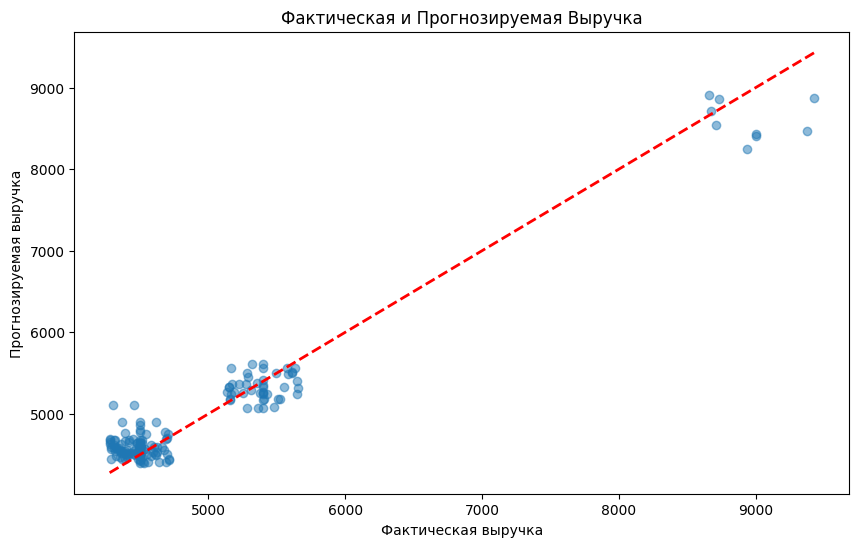

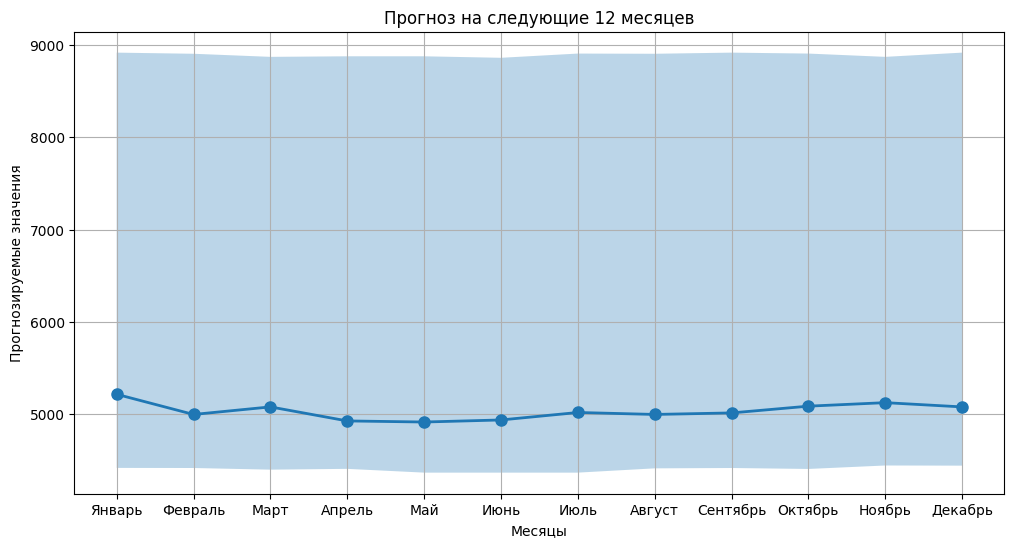

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(n_estimators=150)),
                            ('rf',
                             RandomForestRegressor(n_estimators=200,
                                                   random_state=42)),
                            ('et',
                             ExtraTreesRegressor(n_estimators=200,
                                                 random_state=42))]) OneHotEncoder(drop='first', sparse_output=False) StandardScaler()


In [ ]:
df = df[df['revenue'] > 0]
m, e, s = process_and_train_model_gradient_ensemble1(df)
print(m, e, s)

In [ ]:

df['channel'].value_counts()

,count
channel,
социальные сети,368
organic,343
контекстная реклама,159
реклама у блогеров,98
email-рассылки,23
